In [1]:
#%% import libraries

import torch 
import torch.nn as nn
import fastai
from fastai.vision.all import *
from fastai.metrics import *
from fastai.vision.data import *
from fastai.callback import *
from pathlib import Path

fastai.__version__
"""
pip install fastai --upgrade
"""

'\npip install fastai --upgrade\n'

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


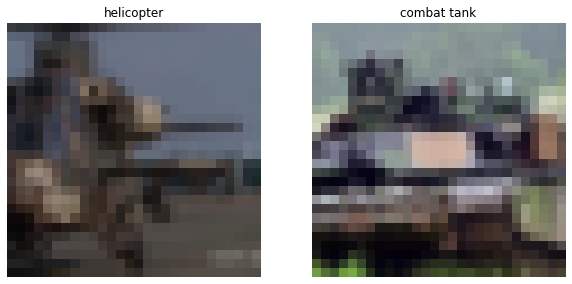

In [2]:
#%% import data

path=Path(r"C:/Users/cinar/Desktop/fastai_armed_forces")

data=ImageDataLoaders.from_folder(path,train="train",valid="valid",test="test",
                                  bs=2,item_tfms=Resize(28),shuffle=True)


data.show_batch(figsize=(10,6))


In [3]:
#%% Create Model

fastai_model=nn.Sequential(
    
    nn.Conv2d(3,4,kernel_size=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(4,8,kernel_size=(2,2)),
    nn.ReLU(),
    nn.Flatten(),
    
    #lineer katmanlar
    nn.Linear(1152,30),
    nn.ReLU(),
    nn.Linear(30,4)# 4class
    
    )

fastai_model


learn=Learner(data,fastai_model,loss_func=fastai.losses.CrossEntropyLossFlat(),
              metrics=[accuracy,error_rate],lr=1.2022644114040304e-05)

learn.summary()


Sequential (Input shape: 2 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     2 x 4 x 27 x 27     
Conv2d                                    52         True      
ReLU                                                           
____________________________________________________________________________
                     2 x 4 x 13 x 13     
MaxPool2d                                                      
____________________________________________________________________________
                     2 x 8 x 12 x 12     
Conv2d                                    136        True      
ReLU                                                           
____________________________________________________________________________
                     2 x 1152            
Flatten                                                        
____________________________________________________________________________
                     2 x 30       

In [10]:
#%% Model Train

epoch=10
learn.fit_one_cycle(epoch)



epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.388122,1.387670,0.269231,0.730769,00:12
1,1.388129,1.386542,0.384615,0.615385,00:12
2,1.387948,1.385315,0.346154,0.653846,00:12
3,1.383101,1.384269,0.346154,0.653846,00:12
4,1.378925,1.383406,0.346154,0.653846,00:11
5,1.375666,1.382515,0.269231,0.730769,00:11
6,1.376845,1.382061,0.307692,0.692308,00:11
7,1.373075,1.381835,0.269231,0.730769,00:11
8,1.381584,1.381747,0.269231,0.730769,00:11
9,1.379466,1.381717,0.269231,0.730769,00:11


In [5]:
#%% Classic Train

epoch2=5
learn.fit(epoch2,0.001)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.788799,0.766633,0.538462,0.461538,00:12
1,0.837137,0.713301,0.615385,0.384615,00:11
2,0.745357,0.674181,0.653846,0.346154,00:11
3,0.729927,0.692421,0.692308,0.307692,00:12
4,0.734028,0.667993,0.653846,0.346154,00:11


In [5]:
#%% Model Train with Fine Tune

epoch3=5

learn.fine_tune(epoch3,freeze_epochs=5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.750944,0.716371,0.730769,0.269231,00:11
1,0.772837,0.727733,0.730769,0.269231,00:11
2,0.762602,0.772479,0.576923,0.423077,00:11
3,0.781230,0.702170,0.730769,0.269231,00:11
4,0.814317,0.795754,0.653846,0.346154,00:11


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.656149,0.696309,0.653846,0.346154,00:11
1,0.694087,0.640820,0.692308,0.307692,00:11
2,0.639841,0.653414,0.653846,0.346154,00:11
3,0.628234,0.628566,0.730769,0.269231,00:11
4,0.574579,0.622558,0.692308,0.307692,00:11


In [6]:
#%% Model test

learn.validate()



(#3) [0.6225582957267761,0.692307710647583,0.3076923191547394]

SuggestedLRs(valley=1.2022644114040304e-05)

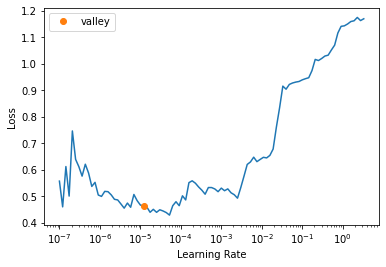

In [7]:
#%% Learning Rate oranını bulma

learn.lr_find()

In [11]:
#%% Model Save

learn.export(fname=r"C:\Users\cinar\Desktop\Computer Vision-AI\fastAi\fastai.pkl")

In [4]:
#%% Model Load

fastai_model=load_learner(r"C:\Users\cinar\Desktop\Computer Vision-AI\fastAi\fastai.pkl")
fastai_model


('helicopter', TensorImage(3), TensorImage([0.2736, 0.2283, 0.2200, 0.2780]))

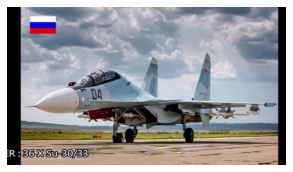

In [5]:
#%% fastai_model test
image=data.valid_ds[2][0]
show_image(image)
fastai_model.predict(image)
# Epoch sayımızı arttırıp tekrardan modeli eğitirsek daha iyi sonuçlar alabiliriz...

('helicopter', TensorImage(3), TensorImage([0.2728, 0.2270, 0.2195, 0.2807]))

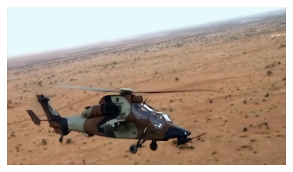

In [15]:
#%% fastai_model test 2
image=data.valid_ds[25][0]
show_image(image)
fastai_model.predict(image)
# Epoch sayımızı arttırıp tekrardan modeli eğitirsek daha iyi sonuçlar alabiliriz...

In [9]:
path2=Path(r"Aircraft (67).jpg")
fastai_model.predict(path2)

('helicopter', TensorImage(3), TensorImage([0.2725, 0.2275, 0.2217, 0.2783]))

In [12]:
#%% Hata Temizleme

from fastai.vision.widgets import ImageClassifierCleaner

clean_error=ImageClassifierCleaner(learn)
clean_error
